# Face Emotion Detection Project

In [49]:

import cv2 as cv
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt


## Define Dataset Path

In [50]:

emotion_data_dir = '/content/drive/MyDrive/UTKFace/fane_data'

if not emotion_data_dir:
    print("Emotion dataset path is empty! Please provide a valid path.")


## Load and Preprocess Data

In [51]:
img_size = (64, 64)
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load data function for subfolder-based dataset
def load_emotion_data(emotion_data_dir):
    """
    Load emotion data from a given directory organized by subfolders.
    Each subfolder represents an emotion.
    """
    images = []
    labels = []

    for label, emotion in enumerate(emotion_classes):
        emotion_folder = os.path.join(emotion_data_dir, emotion)
        if not os.path.exists(emotion_folder):
            print(f"Warning: Subfolder '{emotion}' does not exist in {emotion_data_dir}")
            continue

        for filename in os.listdir(emotion_folder):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(emotion_folder, filename)


                print(f"Processing: {img_path}")

                img = cv.imread(img_path)
                if img is None:
                    print(f"Warning: Failed to load image: {img_path}")
                    continue

                try:
                    img = cv.resize(img, img_size) / 255.0
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error processing file {img_path}: {e}")
                    continue

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int')
    return images, labels


if emotion_data_dir:
    print("Loading emotion dataset...")
    emotion_images, emotion_labels = load_emotion_data(emotion_data_dir)

    if len(emotion_images) == 0:
        print("No images were loaded. Please check the dataset path and folder structure.")
    else:
        print(f"Loaded {len(emotion_images)} images for emotion detection.")


Streaming output truncated to the last 5000 lines.
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1792.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1112.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1442.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1213.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral167.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1542.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1317.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1362.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1709.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1180.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral1669.jpg
Processing: /content/drive/MyDrive/UTKFace/fane_data/neutral/neutral175.jpg
Processing: /content/drive/

# Splitting training and testing

In [52]:

X_train, X_val, y_train, y_val = train_test_split(
        emotion_images, emotion_labels, test_size=0.2, random_state=42
        )
print(f"Loaded {len(emotion_images)} images for emotion detection.")


Loaded 14394 images for emotion detection.


## Build Emotion Detection Model

In [53]:

# Build the emotion detection model
def create_emotion_model(output_units):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(output_units, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model


emotion_model = create_emotion_model(output_units=len(emotion_classes))
emotion_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Train the Model

In [54]:

# Train the emotion detection model
if emotion_data_dir:
    print("Training Emotion Detection Model...")
    history = emotion_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)


Training Emotion Detection Model...
Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.2304 - loss: 1.9113 - val_accuracy: 0.3338 - val_loss: 1.6568
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.3284 - loss: 1.6852 - val_accuracy: 0.3640 - val_loss: 1.6112
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3516 - loss: 1.6242 - val_accuracy: 0.3842 - val_loss: 1.5750
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.3754 - loss: 1.5853 - val_accuracy: 0.4026 - val_loss: 1.5342
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3893 - loss: 1.5576 - val_accuracy: 0.4095 - val_loss: 1.5368
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4027 - loss: 1.5296 - val_accuracy: 0.4182 - val_loss: 1.5031
Epoch 7/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4053 - loss: 1.5038 - val_accuracy: 0.4248 - val_loss: 1.4734
Epoch 8/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - a

## Evaluate the Model

In [55]:

# Evaluate the model
if emotion_data_dir:
    print("Evaluating Emotion Detection Model...")
    loss, accuracy = emotion_model.evaluate(X_val, y_val)
    print(f"Test accuracy: {accuracy:.2f}, Test loss: {loss:.2f}")


Evaluating Emotion Detection Model...
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4975 - loss: 1.3452
Test accuracy: 0.49, Test loss: 1.37


## Predict Emotion

## Save the Model

In [56]:
import os
emotion_model.save(os.path.join('/content/drive/My Drive/','Emotion_classification.h5'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Emotion: sad


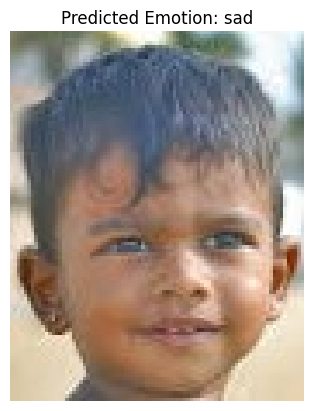

In [38]:

image_path = '/content/drive/MyDrive/boy_1.jpg'

# Assuming emotion_model is your trained model
if emotion_data_dir:
  predict_emotion(image_path, emotion_model)


In [60]:

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load emotion and gender models
emotion_model_path = '/content/drive/My Drive/Emotion_classification.h5'
gender_model_path = '/content/drive/My Drive/gender_classification.h5'  # Assuming this is your gender model path

emotion_model = load_model(emotion_model_path)
gender_model = load_model(gender_model_path)

# Define emotion and gender classes
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
gender_classes = ['Male', 'Female']  # Assuming you have two classes: Male and Female
img_size = (64,64)

def predict_emotion_and_gender(image_path, emotion_model, gender_model):
    """Predicts both emotion and gender from a given image path."""

    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, img_size) / 255.0
    img = np.expand_dims(img, axis=0)

    # Predict emotion
    emotion_prediction = emotion_model.predict(img)
    predicted_emotion = emotion_classes[np.argmax(emotion_prediction)]

    # Predict gender
    gender_prediction = gender_model.predict(img)
    predicted_gender = gender_classes[np.argmax(gender_prediction)]

    return predicted_emotion, predicted_gender

# Path to the image
image_path = '/content/drive/MyDrive/boy_1.jpg'

# Predict emotion and gender
predicted_emotion, predicted_gender = predict_emotion_and_gender(
    image_path, emotion_model, gender_model
)

# Print the predictions
print(f"Predicted Emotion: {predicted_emotion}")
print(f"Predicted Gender: {predicted_gender}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 103s 103s/step
Predicted Emotion: neutral
Predicted Gender: Male


In [58]:
print("Emotion Model Input Shape:", emotion_model.input_shape)
print("Gender Model Input Shape:", gender_model.input_shape)


Emotion Model Input Shape: (None, 64, 64, 3)
Gender Model Input Shape: (None, 64, 64, 3)
